#### Immports, Read and defined database

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("survey_results_public.csv")


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary" }, axis=1) 
df.head(5)
df.shape

(64461, 5)

### Prep data 

In [4]:
#remove null salary 
df = df[df["Salary"].notnull()]
df.head(5)


,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [6]:
#Drop all NaN - this is a brute force way of doing it 
df =df.dropna()
df.isnull().sum()

df.head(5)


,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [7]:
df.shape

(34025, 5)

#### Sort columns 
#### 1. Employment 

In [8]:
# Only interested in fulltime employment so this is removing all non full time employees from the database 
df1 = df[df["Employment"] == "Employment full-time"]
df1= df.drop("Employment", axis=1)

# Printing the resulting DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34025 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34025 non-null  object 
 1   EdLevel       34025 non-null  object 
 2   YearsCodePro  34025 non-null  object 
 3   Salary        34025 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [9]:
df1.shape
df1.head(10)

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",1,66000.0
15,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,108576.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,79000.0
17,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,1260000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,83400.0


#### 2. Countries 
As can be seen below there are many countries with only one or two inputs. In order to sort data we will group all the countries with a count of 400 to "Other "

In [10]:
df1["Country"].value_counts()

Country
United States        8082
India                2563
United Kingdom       2551
Germany              2206
Canada               1293
                     ... 
Brunei Darussalam       1
Guinea                  1
Burkina Faso            1
Malawi                  1
Yemen                   1
Name: count, Length: 159, dtype: int64

In [11]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df1['Country'] = df1['Country'].map(country_map)
df1.Country.value_counts()

Country
Other                 10174
United States          8082
India                  2563
United Kingdom         2551
Germany                2206
Canada                 1293
Brazil                 1139
France                 1103
Netherlands             798
Poland                  789
Australia               755
Spain                   744
Italy                   660
Russian Federation      595
Sweden                  573
Name: count, dtype: int64

#### Plot
The salary is plotted againt countries.

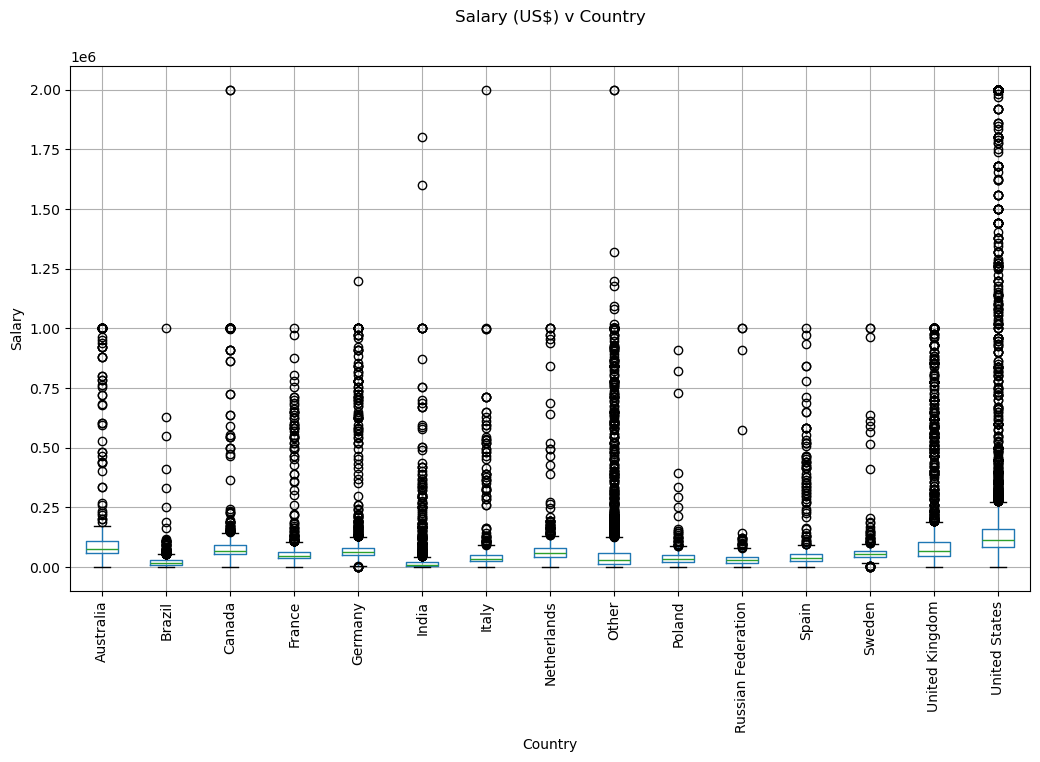

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df1.boxplot('Salary', 'Country' , ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

#plot the salary againts the countries 


IN the plot above there are many outlies that are skewing the data. In order too fix this a range is set and Countries grouped into Other are discarded. 

In [14]:
#Keep values in a certain range in order and also drop other 
df1 = df1[df1["Salary"] <= 250000]
df1 = df1[df1["Salary"] >= 10000]
df1 = df1[df1['Country'] != 'Other']

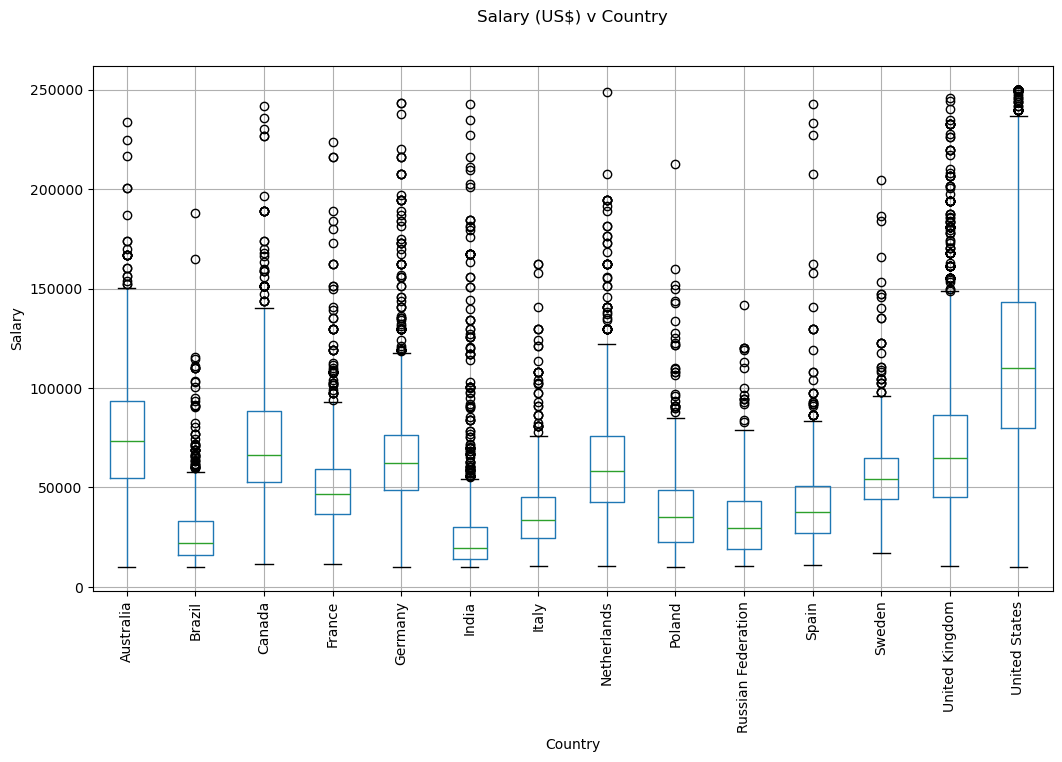

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df1.boxplot('Salary', 'Country' , ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


Here we can see after removing Others and creating a range the box plot looks more.. 

### Clean Data for ML 

#### YearsCodePro 
This column which denotes the number of years of coding is mostly numerical data appart from two inputs of More than 50 years and Less than 1 year. This is "cleaned" by retunring 50 and 05 respectively. 

In [16]:
df1["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '10', '12', '29', '6',
       '28', '8', '15', '11', '25', '9', 'Less than 1 year', '5', '21',
       '16', '35', '18', '14', '24', '32', '19', '22', '38', '30', '26',
       '27', '17', 'More than 50 years', '40', '34', '33', '36', '39',
       '31', '37', '41', '45', '42', '43', '44', '48', '50', '49', '46'],
      dtype=object)

In [17]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df1['YearsCodePro'] = df1['YearsCodePro'].apply(clean_experience)

In [18]:
df1["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. , 23. ,  3. , 10. , 12. , 29. ,
        6. , 28. ,  8. , 15. , 11. , 25. ,  9. ,  0.5,  5. , 21. , 16. ,
       35. , 18. , 14. , 24. , 32. , 19. , 22. , 38. , 30. , 26. , 27. ,
       17. , 50. , 40. , 34. , 33. , 36. , 39. , 31. , 37. , 41. , 45. ,
       42. , 43. , 44. , 48. , 49. , 46. ])

#### Education (Ed Level)
Has many different values and they are ordered into 3 seperate categories.

In [19]:
df1.head(5)

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,40070.0
11,Spain,Some college/university study without earning ...,7.0,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20.0,38916.0


In [20]:
df1["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [21]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'



In [22]:
df1['EdLevel'] = df1['EdLevel'].apply(clean_education)

These are then encoded into levels 

In [23]:
le_education = LabelEncoder()
df1['EdLevel'] = le_education.fit_transform(df1['EdLevel'])
df1["EdLevel"].unique()


array([0, 2, 1, 3])

In [24]:
# Then the original column is removed 
#df1 = df1.drop("EdLevel", axis=1) 

#### Country is also encoded and removed from data frame:

In [25]:
le_country = LabelEncoder()
df1["Country"] = le_country.fit_transform(df1['Country'])
df1["Country"].unique()


array([13, 12, 10,  7,  4,  2,  6,  1,  3, 11,  5,  8,  0,  9])

In [26]:

df1.head(5)

,Country,EdLevel,YearsCodePro,Salary
7,13,0,13.0,116000.0
9,12,2,4.0,32315.0
10,12,0,2.0,40070.0
11,10,1,7.0,14268.0
12,7,1,20.0,38916.0


#### Split into target(y, X)

In [27]:
X = df1.drop("Salary", axis=1)
y = df1["Salary"]

In [28]:
#first fit the data 
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [29]:
y_pred = linear_reg.predict(X)


To calculate the error to see which preforms better 

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error

#error is the number that it will be off by so in this case every prediction will be on average 45540 off 

40481.79183033168

In [31]:
# try see if DTR is any better
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state= 0)
dec_tree_reg.fit(X, y.values)
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [32]:
y_pred = dec_tree_reg.predict(X)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,196.77


In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)


RandomForestRegressor(random_state=0)

In [35]:
y_pred= random_forest_reg.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,278.31


In [37]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [38]:
regressor = gs.best_estimator_ 

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,354.59


In [39]:
X1 = np.array([["United States", 'Master’s degree', 15]])
X1

array([['United States', 'Master’s degree', '15']], dtype='<U21')

In [40]:
X = np.array([['United States', 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U21')

In [41]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [43]:
y_pred = regressor.predict(X)
y_pred

/Users/macbookair/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138886.44025157])

In [44]:
import pickle 

In [47]:
data ={"model": regressor, "le_country": le_country, "le_education":le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [48]:
with open('saved_steps.pkl' , 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [49]:
y_pred = regressor_loaded.predict(X)
y_pred

/Users/macbookair/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138886.44025157])